<a href="https://colab.research.google.com/github/osterhult/SomeMLCode/blob/main/ML_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import RocCurveDisplay, roc_curve, auc
from sklearn.metrics import classification_report, log_loss 

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb

### Handle imbalanced datasets
import imblearn

In [7]:
tf.__version__

'2.8.2'

## Getting data and inspecting it

In [8]:
data = pd.read_csv('nbi_data_set.csv', sep=';')

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,"29,85","29,85",No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,"56,95","1889,5",No
2,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),"42,3","1840,75",No
3,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),"89,1","1949,4",No
4,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,"29,75","301,9",No


### Deleting the customerID column 
Since it will not bring anything to the model (only unique values)

In [9]:
data.drop('customerID',axis=1,inplace=True)

### Checking out which type each column of the dataset has

In [10]:
data_type_python = pd.DataFrame(data.dtypes).T.rename({0:'python data types'})
data_type_python

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
python data types,object,int64,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object


### Check for missing values in columns

In [11]:
data_count = pd.DataFrame(data.count()).T.rename({0:'total data'})
data_count

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
total data,5374,5374,5374,5374,5374,5374,5374,5374,5374,5374,5374,5374,5374,5374,5374,5374,5374,5374,5363,5374


### Check for null values in columns

In [12]:
data_null_total = pd.DataFrame(data.isna().sum()).T.rename({0:'total null'})
data_null_total

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
total null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0


### Since all the missing values where where null values replacing null with 0

In [13]:
data['TotalCharges'].fillna(0, inplace=True)
data['TotalCharges'].isna().sum()

0

### Numerical and Categorical data

In [14]:
# numerical
column_numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']

# categorical
column_categorical = list(data.columns)
column_categorical.remove('tenure')
column_categorical.remove('MonthlyCharges')
column_categorical.remove('TotalCharges')

column_categorical

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5374 entries, 0 to 5373
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            5374 non-null   object
 1   SeniorCitizen     5374 non-null   int64 
 2   Partner           5374 non-null   object
 3   Dependents        5374 non-null   object
 4   tenure            5374 non-null   int64 
 5   PhoneService      5374 non-null   object
 6   MultipleLines     5374 non-null   object
 7   InternetService   5374 non-null   object
 8   OnlineSecurity    5374 non-null   object
 9   OnlineBackup      5374 non-null   object
 10  DeviceProtection  5374 non-null   object
 11  TechSupport       5374 non-null   object
 12  StreamingTV       5374 non-null   object
 13  StreamingMovies   5374 non-null   object
 14  Contract          5374 non-null   object
 15  PaperlessBilling  5374 non-null   object
 16  PaymentMethod     5374 non-null   object
 17  MonthlyCharges

### Variation in each data column

In [15]:
variation_categorical = dict()

for col in column_categorical:
  tmp = data[col].unique().tolist()
  tmp.sort()
  variation_categorical[col] = ', '.join(str(item) for item in tmp)

tmp = pd.Series(variation_categorical)
data_variation_categorical = pd.DataFrame(tmp).T.rename({0:'data variation'})
data_variation_categorical


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
data variation,"Female, Male","0, 1","No, Yes","No, Yes","No, Yes","No, No phone service, Yes","DSL, Fiber optic, No","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","Month-to-month, One year, Two year","No, Yes","Bank transfer (automatic), Credit card (automa...","No, Yes"


## Preprocessing the data

### Replacing "No..." with a simple "No" makes a few more feature "binery"

In [16]:
# replace redundant values
data.replace({'No phone service':'No',
            'No internet service':'No'},
            inplace=True)

### Turning "binary" columns into 0:s and 1:s

In [17]:
from sklearn.preprocessing import LabelEncoder

binerycat = ['gender','Partner','Dependents','PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling','Churn']

# Encode Categorical Columns
le = LabelEncoder()
data[binerycat] = data[binerycat].apply(le.fit_transform)


In [18]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,"29,85","29,85",0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,"56,95","1889,5",0
2,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),"42,3","1840,75",0
3,1,0,0,1,22,1,1,Fiber optic,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),"89,1","1949,4",0
4,0,0,0,0,10,0,0,DSL,1,0,0,0,0,0,Month-to-month,0,Mailed check,"29,75","301,9",0


### Turning columns with numerical data into numerical (floats)

In [19]:

data['MonthlyCharges'] = data['MonthlyCharges'].apply(lambda x: str(x).replace(',', '.'))
data['TotalCharges'] = data['TotalCharges'].apply(lambda x: str(x).replace(',', '.'))

data['MonthlyCharges'] = data['MonthlyCharges'].astype(float, errors = 'raise')
data['TotalCharges'] = data['TotalCharges'].astype(float, errors = 'raise')

### Checking the datatypes of the dataset

In [20]:
data_type_python = pd.DataFrame(data.dtypes).T.rename({0:'python data types'})
data_type_python

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
python data types,int64,int64,int64,int64,int64,int64,int64,object,int64,int64,int64,int64,int64,int64,object,int64,object,float64,float64,int64


### Handle categorical columns

In [21]:

 # Simple function to check if a column is categorical  
def is_categorical(array_like):
    return array_like.dtype.name == 'category'

# All categorical columns
object_cols = [col for col in data.columns if data[col].dtype == "object"
               or is_categorical(data[col])]

# Columns that will be one-hot encoded (less than 10 unique values)
categorical_cols = [col for col in object_cols if data[col].nunique() < 10]
categorical_cols


['InternetService', 'Contract', 'PaymentMethod']

## Make a ColumnTransformer to preprocess rest of the data

### Standard scale the numeric data and one hot encode the categorical data

In [22]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
    
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

### Put togheter the preprocessor

In [23]:
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = categorical_cols

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

### Making the features and the target

In [24]:
X = data.drop('Churn', axis=1)
y = data['Churn']

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5374 entries, 0 to 5373
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5374 non-null   int64  
 1   SeniorCitizen     5374 non-null   int64  
 2   Partner           5374 non-null   int64  
 3   Dependents        5374 non-null   int64  
 4   tenure            5374 non-null   int64  
 5   PhoneService      5374 non-null   int64  
 6   MultipleLines     5374 non-null   int64  
 7   InternetService   5374 non-null   object 
 8   OnlineSecurity    5374 non-null   int64  
 9   OnlineBackup      5374 non-null   int64  
 10  DeviceProtection  5374 non-null   int64  
 11  TechSupport       5374 non-null   int64  
 12  StreamingTV       5374 non-null   int64  
 13  StreamingMovies   5374 non-null   int64  
 14  Contract          5374 non-null   object 
 15  PaperlessBilling  5374 non-null   int64  
 16  PaymentMethod     5374 non-null   object 


## Machine Learning part more or less starts here

### Preprocess the data

In [26]:
X = preprocessor.fit_transform(X)

### Splitting up data to train and test sets

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Set up of different classifiers to see which one matches the problem the best

### Combining test of more "regular" classifiers not based on deep learning 

In [28]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.1, gamma=1, probability=True, random_state=0),
    DecisionTreeClassifier(random_state=0),
    RandomForestClassifier(n_estimators=100, random_state=0),
    AdaBoostClassifier(n_estimators=50, random_state=0),
    AdaBoostClassifier(n_estimators=600, learning_rate=0.1, random_state=0),
    GradientBoostingClassifier(learning_rate=0.1, max_depth=1, n_estimators=50, random_state=0),
    xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', colsample_bytree=0.6, gamma=0.5, max_depth=3,
        min_child_weight=1, n_estimators=300, subsample=0.8)
    ]

#### Making prediction and calculate which model is the better one


KNeighborsClassifier(n_neighbors=3)
model score: 0.958
[[1030    7]
 [  38    0]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1037
           1       0.00      0.00      0.00        38

    accuracy                           0.96      1075
   macro avg       0.48      0.50      0.49      1075
weighted avg       0.93      0.96      0.94      1075


SVC(C=0.1, gamma=1, probability=True, random_state=0)
model score: 0.965
[[1037    0]
 [  38    0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1037
           1       0.00      0.00      0.00        38

    accuracy                           0.96      1075
   macro avg       0.48      0.50      0.49      1075
weighted avg       0.93      0.96      0.95      1075


DecisionTreeClassifier(random_state=0)
model score: 0.927
[[993  44]
 [ 34   4]]
              precision    recall  f1-score   support

           0       0.97  

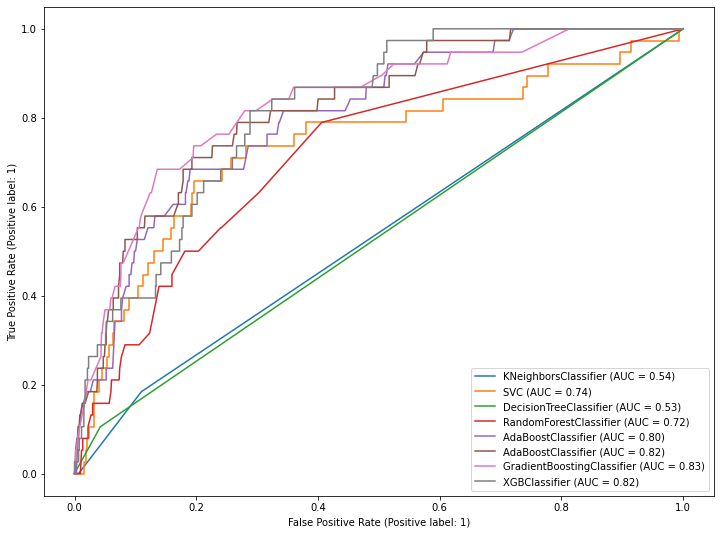

In [29]:
# Plotting a figure of width 6 and height 3
plt_1 = plt.figure(figsize=(12, 9))

ax = plt.gca()

for classifier in classifiers:

    classifier.fit(X_train, y_train)

    print("\n" + str(classifier))
    print("model score: %.3f" % classifier.score(X_test, y_test))

    print ('===========================')
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print(classification_report(y_test, y_pred, zero_division=0))

    print ('===========================')
    clf_disp = RocCurveDisplay.from_estimator(classifier, X_test, y_test, ax=ax)

plt.show()

### Fine tuning of the classifiers
Due to time consuming it has been commented out. If interested run each classifier by itself

In [30]:
# clf = xgb.XGBClassifier(learning_rate=0.02, objective='binary:logistic',
#                     silent=True, nthread=1, use_label_encoder=False, eval_metric='logloss')

# clf = AdaBoostClassifier(random_state=0)

# clf = GradientBoostingClassifier(random_state=0)

# #########################

# clf_pipe = Pipeline(steps=
#     [
#         ('preprocessor', preprocessor), 
#         ('clf', clf)
#     ]
# )

############################

# SVC
# parameters = [
#     {
#         'clf__kernel': ["rbf", "linear", "poly", "sigmoid"],
#         'clf__C': [0.1, 1, 2, 3, 5, 10, 100],
#         'clf__gamma': [1, 0.1, 0.01, 0.001],
#     }
# ]

# # XGB
# parameters = [
#     {
#         'clf__min_child_weight': [1, 5, 10],
#         'clf__n_estimators': [50, 100, 300, 600],
#         'clf__gamma': [0.5, 1, 1.5, 2, 5],
#         'clf__subsample': [0.6, 0.8, 1.0],
#         'clf__colsample_bytree': [0.6, 0.8, 1.0],
#         'clf__max_depth': [3, 4, 5]
#     }
# ] 
# 

# AdaBoostClassifier
# parameters = [
#     {
#         'clf__learning_rate': [0.1, 0.5, 1],
#         'clf__n_estimators': [50, 100, 300, 600],
#     }
# ] 


# # GradientBoostingClassifier
# parameters = [
#     {
#         #'clf__learning_rate': [0.1, 0.5, 1],
#         'clf__n_estimators': [50, 100, 300, 600],
#         # 'clf__subsample': [0.6, 0.8, 1.0],
#         #'clf__max_depth': [1, 3, 5]
#     }
# ] 


#############################

# # Type of scoring used to compare parameter combinations
# acc_scorer = make_scorer(accuracy_score)

# # Run the grid search
# grid_obj = GridSearchCV(clf_pipe, parameters, scoring=acc_scorer, error_score='raise')

#############################

# grid_obj.fit(X_train, y_train)

#############################

# print("Best parameter (CV score=%0.3f):" % grid_obj.best_score_)
# print(grid_obj.best_params_)

## Result

If looking at the validation of the models I would say the winner is the:<br>
### GradientBoostingClassifier
... But hey...<br>
Maybe the dataset is not in balance. Let's check that out.

## Check the imbalance of the target in the dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


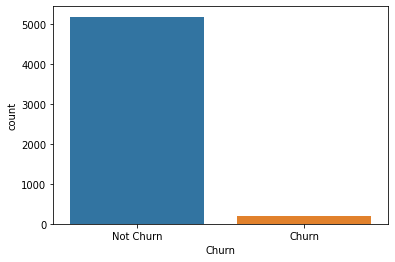

In [31]:
# visualize the target variable
g = sns.countplot(data['Churn'])
g.set_xticklabels(['Not Churn','Churn'])
plt.show()

### YES, the dataset is imbalanced
Let start over and split up the already preprocessed data 

## Handle the imbalance in the dataset
Can be done with different technices. On the ones I tried (Under- and Over-sampling, SMOTE and NearMiss)<br>
the SMOTE is the best one. Therefor the rest of them is commented out. 

### Importing libraries

In [32]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from collections import Counter

### SMOTE

In [33]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 5174, 1: 200})
Resample dataset shape Counter({0: 5174, 1: 5174})


## Splitting up data to train and test sets... again...
This time using the SMOTE values

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=0)

### Again test the different classifiers to see which one matches the problem the best

### Without fine tuning (actually gave best scores)

In [35]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True, class_weight='balanced', random_state=0),
    DecisionTreeClassifier(random_state=0),
    RandomForestClassifier(n_estimators=100, random_state=0),
    AdaBoostClassifier(random_state=0),
    GradientBoostingClassifier(random_state=0),
    xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    ]


### Making prediction and calculate which model is the better one


KNeighborsClassifier(n_neighbors=3)
model score: 0.891
[[854 171]
 [ 54 991]]
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      1025
           1       0.85      0.95      0.90      1045

    accuracy                           0.89      2070
   macro avg       0.90      0.89      0.89      2070
weighted avg       0.90      0.89      0.89      2070


SVC(C=0.025, class_weight='balanced', probability=True, random_state=0)
model score: 0.766
[[732 293]
 [192 853]]
              precision    recall  f1-score   support

           0       0.79      0.71      0.75      1025
           1       0.74      0.82      0.78      1045

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.76      2070
weighted avg       0.77      0.77      0.77      2070


DecisionTreeClassifier(random_state=0)
model score: 0.903
[[917 108]
 [ 93 952]]
              precision    recall  f1-score   support

           0   

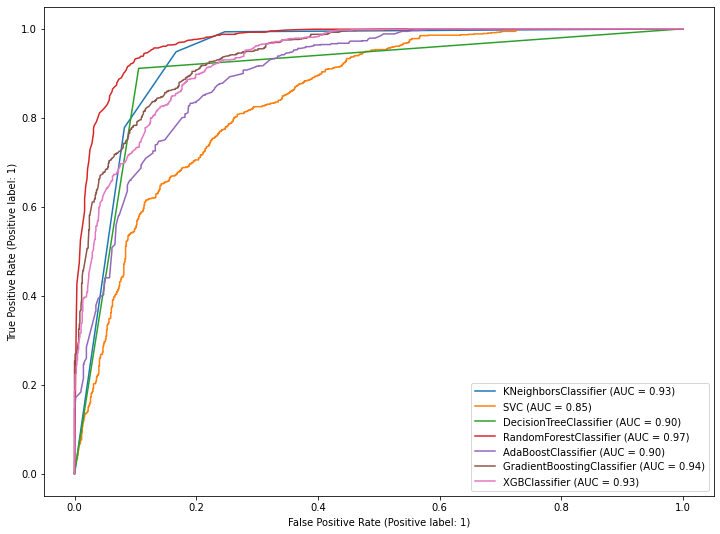

In [37]:
# Plotting a figure of width 6 and height 3
plt_1 = plt.figure(figsize=(12, 9))

ax = plt.gca()

for classifier in classifiers:

    classifier.fit(X_train, y_train)

    print("\n" + str(classifier))
    print("model score: %.3f" % classifier.score(X_test, y_test))

    print ('===========================')
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print(classification_report(y_test, y_pred, zero_division=0))

    print ('===========================')
    clf_disp = RocCurveDisplay.from_estimator(classifier, X_test, y_test, ax=ax)

plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## And the winner is Random Forest Classifier.....